In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import random

In [3]:
raw_data = pd.read_json('C:/Users/geoff/PycharmProjects/machine_learning_assignment3/assignment3_files/food_enforcement_US_bacteria.json', orient='records')

In [4]:
print(raw_data.shape)
print(raw_data.head(25).product_description)

(6104, 26)
0     Native Catch Salmon Bacon, Traditional flavor....
1     Delish Fruit Burst 10 oz.(283 g)  Enjoy by: 8/...
2     Garden Pure Holiday Fruit Bowl 4 lbs (1.81kg) ...
3     Fresh Fruit Product is labeled in part:  "***F...
4     Ready Pac¿ Gourmet Fruit Bowl, 64oz , UPC 7774...
5     River Ranch brand Diced Grn Cabbage w/Color, 4...
6     Sweet and Sour Stir Fry packaged under the fol...
7     Onion Slab Cut.  Products are labeled in part:...
8     MIX w/yellow onions used as an ingredient.  Pr...
9     Fresh n Easy brand Shred Grn Cabbage w/Color, ...
10    River Ranch brand Three-Color Cole Slaw Mix, 1...
11    MIX w/yellow onions used as an ingredient.  Pr...
12    River Ranch brand Spring Mix, 3 lb bag, UPC: n...
13    River Ranch brand Shredded Red Cabbage, 4 x 5 ...
14    Hy Vee brand Italian Blend, 10 oz bag, UPC:  7...
15    Onions Julienne Sliced.  Products are labeled ...
16    Fresh n Easy brand Garden with Romaine, 4 x 5 ...
17    Cross Valley brand Shredded Ice

In [5]:
from sklearn.feature_extraction.text import HashingVectorizer

# use a hashing vectorizer

vectorizer = HashingVectorizer(n_features=2**14)

corpus = raw_data['product_description']
X = vectorizer.fit_transform(corpus)
X.shape

(6104, 16384)

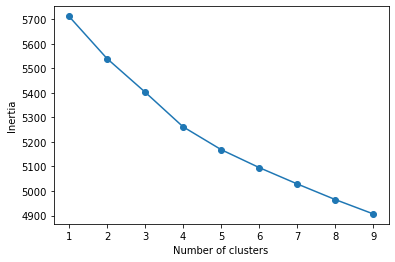

In [7]:
#elbow plot
distortions = []

for i in range (1, 10):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)

# vizualize change in inertia
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

For n_clusters = 55 The average silhouette_score is : 0.10831454528393011
For n_clusters = 68 The average silhouette_score is : 0.12039740286826285
For n_clusters = 73 The average silhouette_score is : 0.12485126940775758
For n_clusters = 77 The average silhouette_score is : 0.12467114760882164
For n_clusters = 85 The average silhouette_score is : 0.13040446800119126


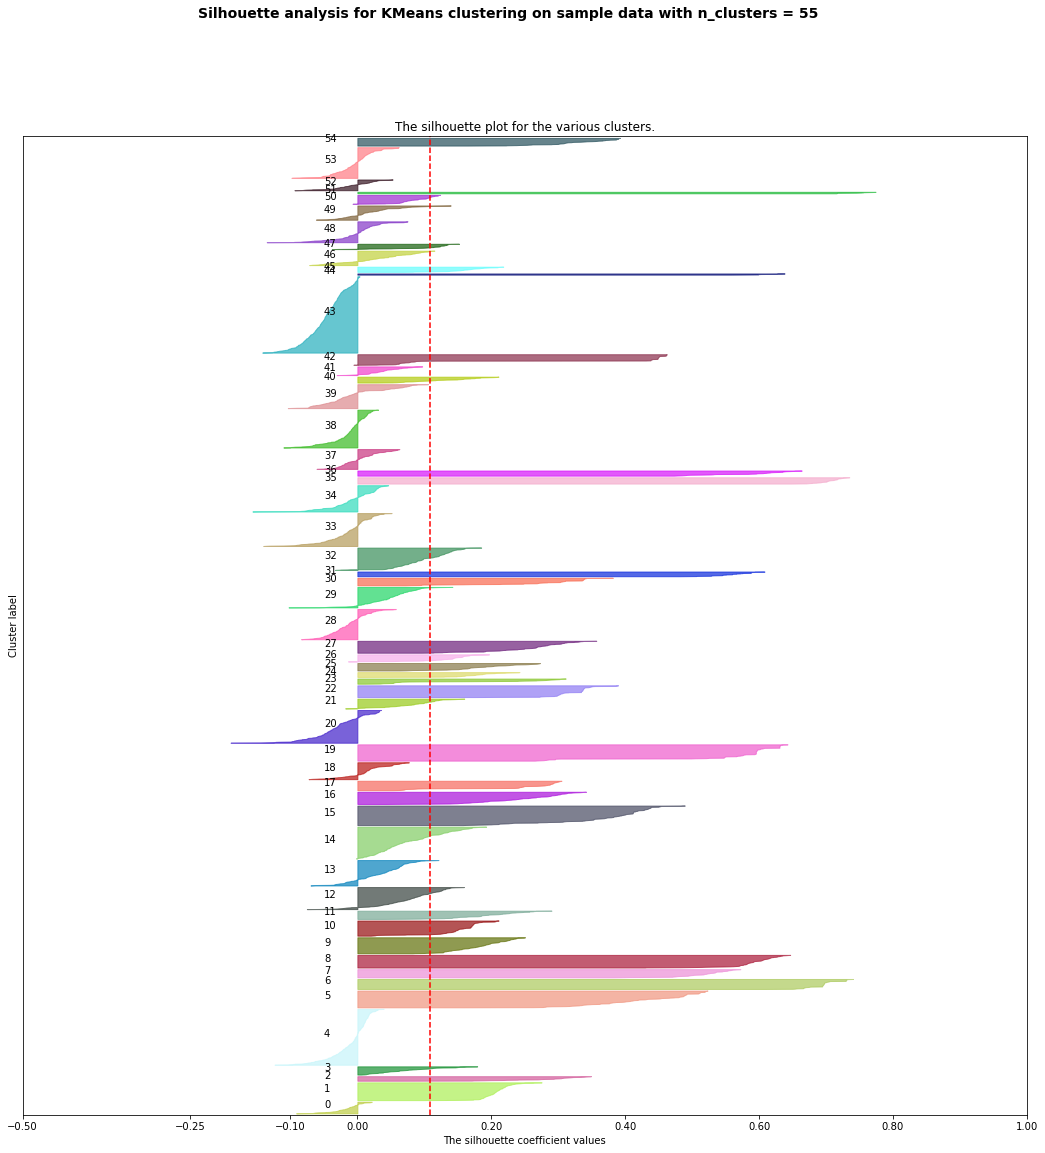

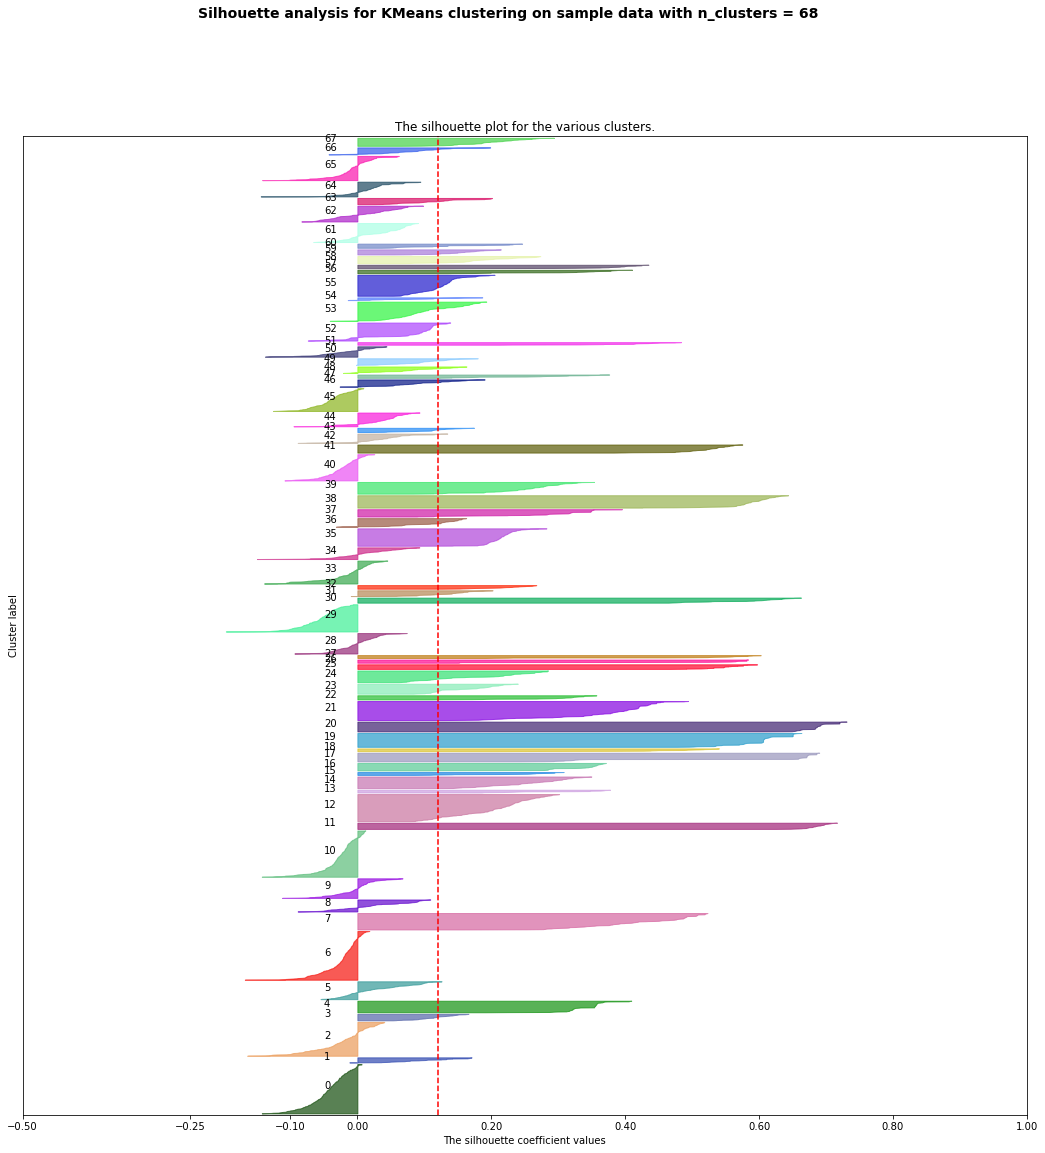

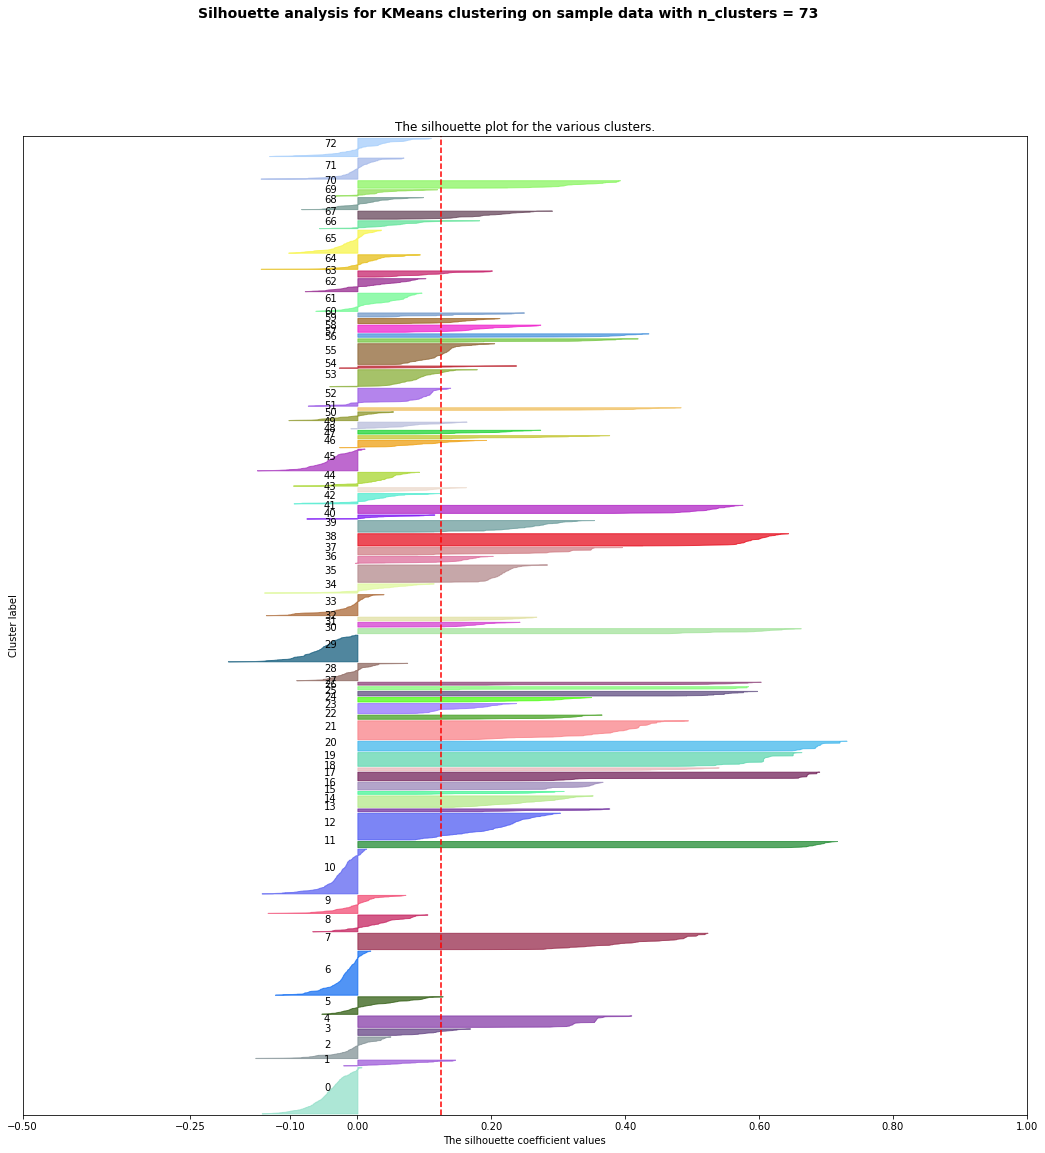

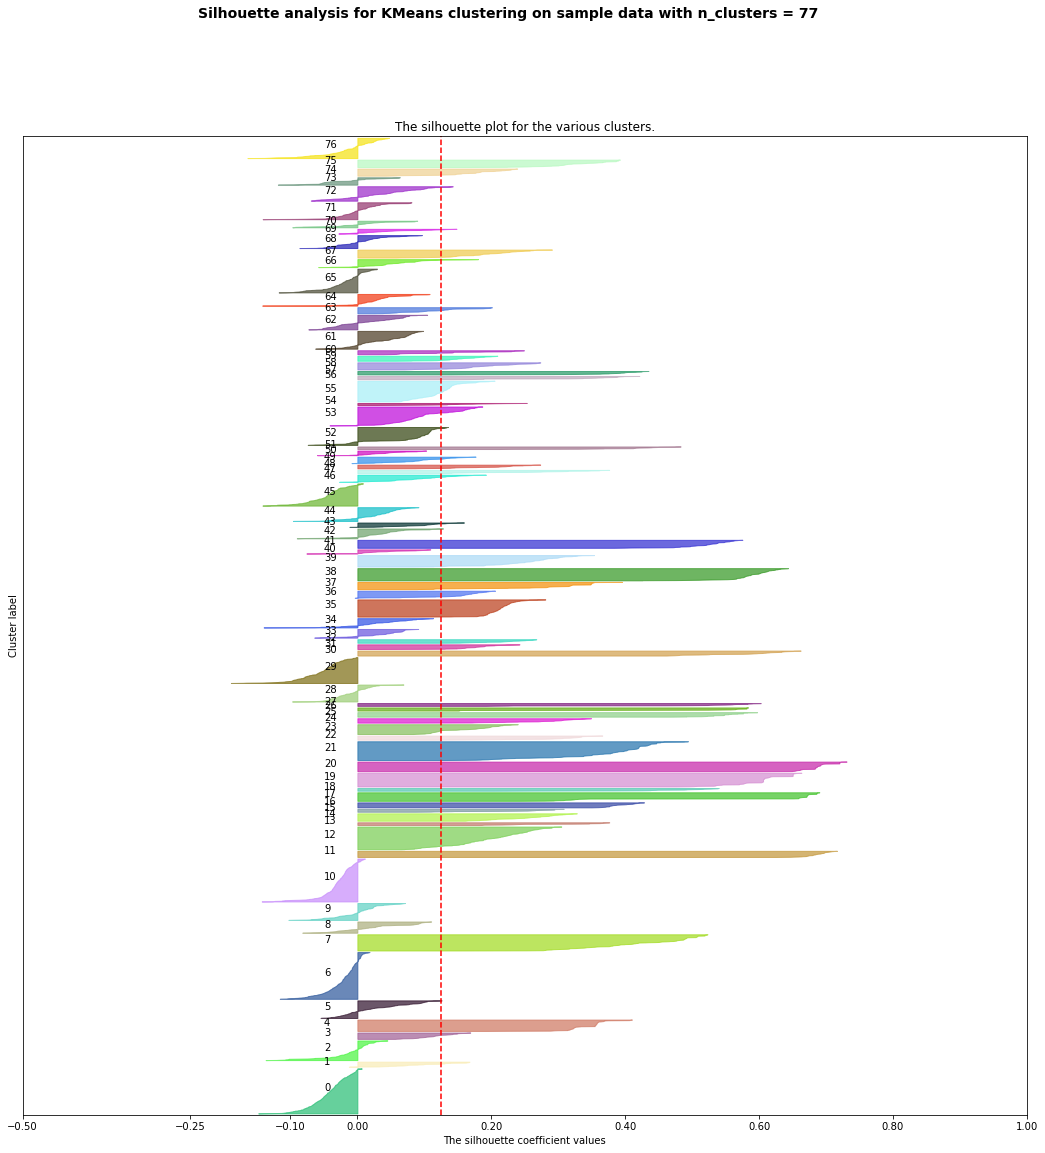

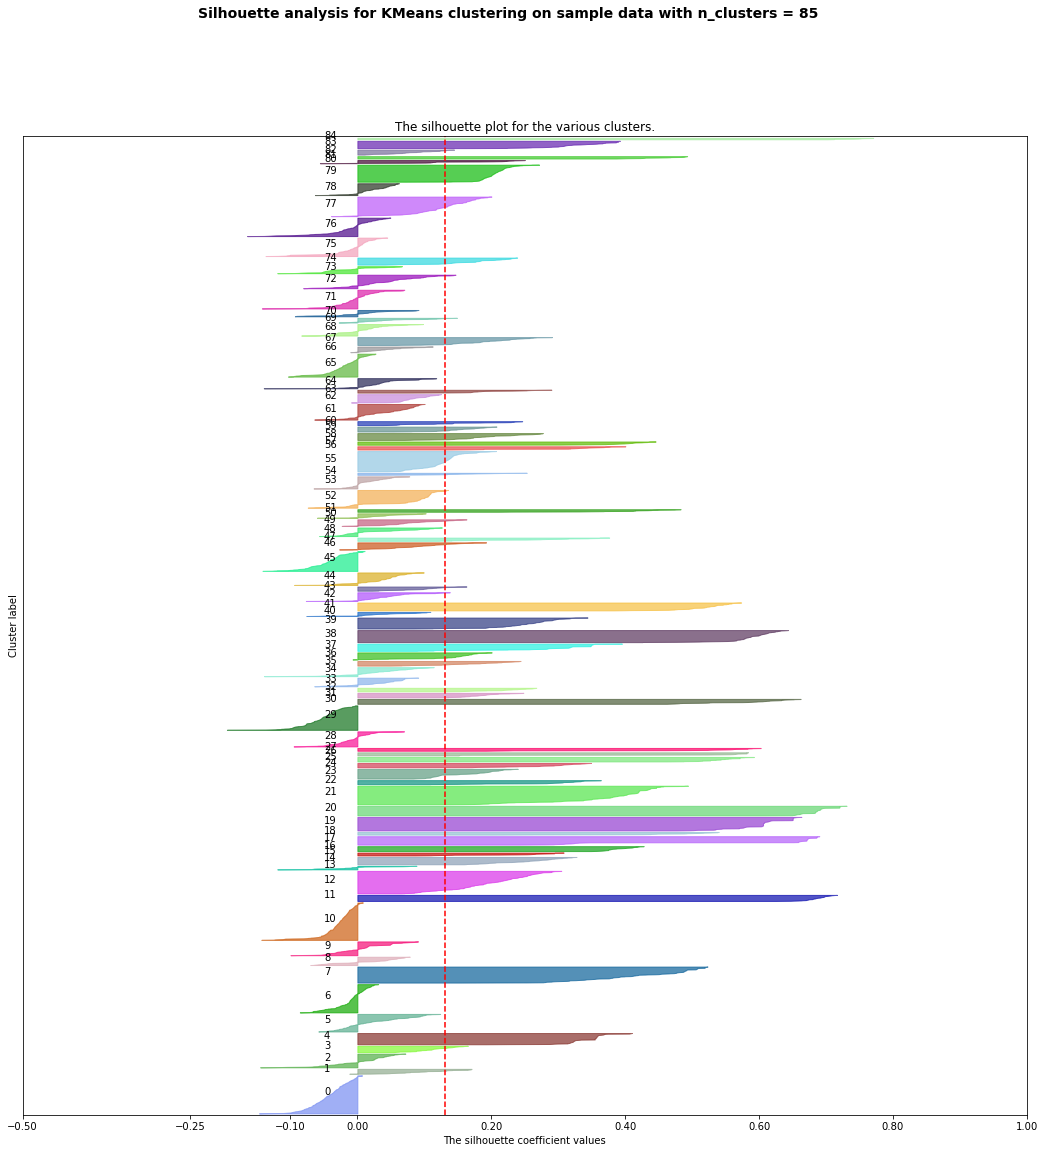

In [15]:
#silhouette analysis

range_n_clusters = [55, 68, 73, 77, 85]
#range_n_clusters = [3, 7, 12, 16, 22, 30, 33, 36, 44, 52, 61, 68]
#range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
#range_n_clusters = [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
#range_n_clusters = [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
#range_n_clusters = [61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
#range_n_clusters = [81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
#range_n_clusters = [2, 3, 5, 11, 16, 22, 25, 35, 50, 60, 70, 75, 85, 90]
#range_n_clusters = [2, 3]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 18)
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.5, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])
    #ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    #km = KMeans(n_clusters=n_clusters)
    #cluster_labels = km.fit_predict(X)
    
    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)    
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        #color = cm.nipy_spectral(float(i) / n_clusters)
        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.5, -0.25, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    #colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors/6104, edgecolor='k')

    # Labeling the clusters
    #centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    #ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    #for i, c in enumerate(centers):
    #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    #ax2.set_title("The visualization of the clustered data.")
    #ax2.set_xlabel("Feature space for the 1st feature")
    #ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [130]:
#####
# DESCRIPTION OF RESULTS
#
# The elbow plot for clusters up to 100 does not show any clear kinks.
# Silhouette charts were run for all 2 <= n_clusters <= 100.
# 
# Silhouette charts for n_clusters = 7, 16, 30, 33, 36 look the most promising in terms of:
# 
# i) fewest number of clusters with a negative silhouette coefficient
# ii) less than 4 large clusters with a negative silhouette coefficient
# iii) at least one large cluster with a positive silhouette coefficient
# iv) large numbers of small clusters with very high silhouette coefficients
#
# Of these, n_clusters = 30 seems to perform the best overall.
# It has only 2 larger clusters with a negative silhouette coefficient (20 and 29).
# It has 2 large clusters with a positive silhouette coefficient (3 and 13).
# It has several small clusters with very high silhouette coefficients (2, 11, 14, 15, 16, 17, 18, 19, 28).
#
# The small clusters with very high silhouette coefficients show excellent uniformity in the items within each cluster.
# 
# For the 2 larger clusters with a negative silhouette coefficient (20 and 29),
# the key words that appear in these clusters have some commonalities:
# 
# Cluster 20 key words: cabbage, spring mix, blended, shredded, salad, iceberg, caesar, chopped, romaine, garden, cole slaw,
#                       sprouts, seeds, kernels, carrot, salmon, trout, tuna, ice cream, sorbet, brine, pistachios, protein
#
# Cluster 29 key words: macaroni, salad, potato salad, dressing, pea salad, salsa, dip, relish, salmon, onions, berries,
#                       peanut butter, ice cream, sorbet, cheese
#
# While there is some bunching of common products within both clusters 20 and 29,
# they both have a diverse mix of unrelated products too.
#
# Product description output for all clusters listed within this text paragraph can be found below:
# clusters: 2, 3, 11, 13, 14, 15, 16, 17, 18, 19, 20, 28, 29
#
# Overall, using n_clusters = 30 to separate the product descriptions results in several clusters that exhibit a very high
# degree of uniformity. There are two large clusters (20 and 29) where there is some degree of commonality within each cluster
# as well as a high degree of grouping of unrelated products. There are also two large clusters (3 and 13) that show very good
# uniformity in product description. Cluster 3 is made up of green beans, while cluster 13 is made up of potato salad
# and macaroni salad.
#
######

In [16]:
#fit Kmeans with k clusters
km = KMeans(n_clusters=73,n_init=30)
km.fit(X)

KMeans(n_clusters=73, n_init=30)

In [17]:
km.labels_

array([67, 57, 57, ..., 64, 14,  0])

In [18]:
# cluster with negative silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 0:
        print(raw_data['product_description'][i])
        print('**********')

Albertsons Brand Peanut Butter Cup Ice Cream, 1.5 Quarts (1.42L), commonly called a 48 fl oz container.     	Peanut Butter Cup Ice Cream,  (Vanilla ice cream with peanut butter cup pieces, fudge and peanut butter swirls); 1.5 QTS (1.42L), (UPC Code 0 41163 45891 8 for Albertsons Peanut Butter Cup)    Packaged in paper cardboard round oblong container. Labeled with a.	Buena Park (IMS Plant Number  06-20). Labeled as "Distributed by SUPERVALU INC. Eden Prairie, MN 55344".    	06-20 1024 RA (plant code, 24 hour time, operator initial)    	MFG 10/08/12 EXP 10/08/13 LOTE A (manufacturing month, day, year , expiration month, day, year, lot number)    	Code date is injected on the bottom of container in black ink  	UPC Code:    0 41163 45891 8 for Albertsons Peanut Butter Cup  
**********
Belfonte Home Run Sundae Ice Cream, A Baseball Nut Blend of Chocolate Peanuts, Chocolate Coated Pretzels, and a Thick Fudge Swirl in Peanut Butter/Chocolate Ice Cream, 56 oz. (1.66L) Belonite Ice Cream Compa

In [19]:
# cluster with negative silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 2:
        print(raw_data['product_description'][i])
        print('**********')

Fruit Cup has Item # 028-07140, and the UPC 0 45009 07140 8.    Label reads in part "*** ALASKA CARROT Fruit Cup Mango / Red Grape 42/4 oz *** Packed By:  Charlie's Produce, Anchorage, AL***".    Use By 8/22/12 through 9/01/12.  
**********
Roundy's Old Fashioned Cream Dill Dip, 12 oz., 0 11150 52603 6      
**********
#362 Ham & Onion Cheeseball	12 ounces  
**********
#441 12 oz Spaghetti in Cherry Tomato Sauce	12 ounces  
**********
#421 12 oz Chicken Parmesan w/Linguini	each  
**********
Pound Cake		12 ounces  
**********
#446 2 ct Triple Cheese Twice Bake	12 ounces  
**********
Peanut Butter Fudge 3 oz bag, manufactured from 6-28-12 thru 9-20-12
**********
#455 12 oz Fried Rice with Pineapple	12 ounces  
**********
#363 Cheddar Free Ham & Onion Cheeseball	12 ounces  
**********
#447 2 ct Bacon Twice Bake	12 ounces  
**********
#459 12 oz Sour Cream & Chive Redskin Potatoes	12 ounces  
**********
#439 10 oz Very Green Pasta	12 ounces  
**********
#440 12 oz Asparagus Linguini with L

In [20]:
# cluster with negative silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 6:
        print(raw_data['product_description'][i])
        print('**********')

Cheese and red onion enchilada, 2 oz packaged in 240/2oz case, net weight 30 lbs. Product labeling reads in part:" REAL MEX FOODS Item # 14800 CHEESE & RED ONION ENCHILADA***KEEP REFRIGERATED*** PACK SIZE: 240/2 OZ. NET WEIGHT:30.00 LBS Real Mex Foods 3305 E. Vernon Ave. Vernon, Ca 90058.***"
**********
Protein Shots, Orange Sunshine Flavor, 2.9 fl oz (Responsible firm on label: Body Choice Nutrition, Inc., 1595 Peachtree Park Way, Suite 204, Cumming, GA  30041)
**********
Cole Slaws: 1) Spartan Cole Slaw, 1 lb., 0 11213 90322 4,  & 3 lbs., 0 11213 90327 9; 2) Market Pantry Cole Slaw, 15 oz., 0 85329 24106 6, & 44 oz., 0 85239 24114; 3) Spoon River Cole Slaw, 3 lb., 0 11596 34238 2    
**********
Highline Mushrooms Sliced, white mushrooms 8 oz.
**********
Acme Homestyle Cole Slaw, 16 oz., 0 11596 14304 3    
**********
DF Special Recipe Macaroni Salad, 16 oz.,  0 70163 98110 2 
**********
Finest Traditions Spinach Dip, 8 oz., 7 33147 10538 2  
**********
Archer Farms Four Bean Salad, 1

In [21]:
# cluster with negative silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 10:
        print(raw_data['product_description'][i])
        print('**********')

Bueno GC 1.5 Hot 5-5# Z, Product Item Number 1096-3. Packaged in sealed poly film pouches.  All packed in cardboard shipper box that is then sealed with attached shipper label. Total package size  5 units of 5 lbs each per case, totaling 25 lbs.
**********
Bueno GC NM Mild 28oz Z, Product Item Number 1034-2. Packaged in plastic containers.   All packed in cardboard shipper box that is then sealed with attached shipper label. Total package size of  6 units of 28 oz each per case totaling 10.5 lbs.
**********
Bueno GC NM Hot 12-13 oz Z, Product Item Number 1022-1.  Packaged in plastic containers.   All packed in cardboard shipper box that is then sealed with attached shipper label. Total package size of  12 units of 13 oz each per case totaling 9.75 lbs.
**********
Bueno GC NM Hot 28oz, Product Item Number 1032-2. Packaged in plastic containers.   All packed in cardboard shipper box that is then sealed with attached shipper label. Total package size of  6 units of 28 oz each per case tot

In [22]:
# cluster with negative silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 29:
        print(raw_data['product_description'][i])
        print('**********')

Sweet and Sour Stir Fry packaged under the following brand names and sizes:  Garden Highway Chef Essentials 10.5 oz;  Raley's 10.5 oz Safeway Farms 10.5 oz .    Manufactured by GH Foods CA LLC,  Rancho Cordova, CA.
**********
Traditional Gourmet Portabella Mushrooms  Garden Highway Chef Essentials brand, 8 oz package .    Manufactured by GH Foods CA LLC,  Rancho Cordova, CA.
**********
Southwest Crimini Mushrooms,  8.0 oz, packaged under Delish  brand name:  and 7 oz package under Chef Essentials Brand name.  Manufactured by GH Foods CA LLC,  Rancho Cordova, CA.
**********
Southwest  Style Portabella Mushrooms: 8.0 oz  .  Packaged under the brand names of Garden Highway Chef Essentials, Raley's and Sprouts.  Manufactured by GH Foods CA LLC,  Rancho Cordova, CA.
**********
Pacific Coast brand Pizza Stuffed Mushrooms, 8 oz package.   Manufactured by GH Foods CA LLC,  Rancho Cordova, CA.
**********
Garden Highway brand Traditional Guacamole Kit, 3 lb package.  Manufactured by GH Foods CA 

In [23]:
# cluster with negative silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 33:
        print(raw_data['product_description'][i])
        print('**********')

Fresh Frozen Grade A Speckled Butter Beans, Net Wt. 32 oz. (2 lb.) 907 g. Dist. By Fresh Frozen Foods, Inc., Jefferson, GA 30549, UPC 0-86069-20000-1; Fresh Frozen Grade A Specked Butter Beans, Net Wt. 80 Oz. (5 lb.) 2268g, Dist. By Fresh Frozen Foods, Inc., Jefferson, GA 30549,UPC 0-86069-50000-2; Fresh Frozen Speckled Butter Beans, Net Wt. 16 oz. (1 lb.) 454 g, UPC 0-86069-20001-8
**********
Fresh Frozen Grade A Jalisco Style Blend, Net Wt. 32 Oz. (2 Lb.) 907g, Dist. By Fresh Frozen Foods, Inc., Jefferson, GA 30549, UPC 0-86069-20405-4
**********
Fresh Frozen Grade A Country Blend, Net Wt. 32 Oz. (2 Lb.) 907g, Dist. By Fresh Frozen Foods, Inc., Jefferson, GA 30549, UPC 0-86069-20170-1
**********
Fresh Frozen IQF Collards, Net Wt. 2 lb., Dist. By Fresh Frozen Foods, Inc., Jefferson, GA 30549, UPC 0-86069-25040-2
**********
Fresh Frozen Grade A Whole Okra, Net Wt. 32 Oz. (2 lb.) 907g. Dist. By Fresh Frozen Foods, Inc., Jefferson, GA 30549, UPC 0-86069-20350-7, Fresh Frozen Grade A Whol

In [24]:
# cluster with negative silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 45:
        print(raw_data['product_description'][i])
        print('**********')

Pastrami Style Smoked Salmon Pre-sliced Sides  (2.5-3.5 lbs. and 2-3 lbs.)
**********
Little Mermaid Brand Smoked Herring.    
**********
Scottish Style Smoked Salmon Pre-sliced Sides (2-3 lbs)
**********
UpRiver Tequila/Cilantro Smoked Salmon Sides( 2-3 lbs.)
**********
Norwegian Smoked Salmon Sides (2-3 lbs.)     
**********
UpRiver Norwegian Smoked Salmon Peppered (2-3 lbs.)
**********
Prestige Smoked Scottish 2.5-3.5  Smoked Salmon Sides    (2-3 lbs.)  
**********
UpRiver Tri-Peppered Vodka Smoked Salmon  (2-3 lbs)
**********
DUTCH FARMSTEAD CHEESE SMOKED PLAIN GOUDA 
**********
SALMON, TURBOT, BUTTERFISH, smoked sliced, Net Weight: 8oz (227g), UPC # 856687004448, Keep refrigerated
**********
Premium Norwegian Salmon, Smoked, slice 8oz (227g), UPC # 856687004288, Keep refrigerated
**********
Great Midwest Applewood Smoked Gouda Cheese, approximately 6 lbs, keep refrigerated    
**********
SPRINGFIELD SMOKED FISH PRESLICED Belly Lox / SPRINGFIELD SMOKED FISH ALL NATURAL BELLY (SALTY

In [25]:
# cluster with negative silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 65:
        print(raw_data['product_description'][i])
        print('**********')

"***Queso del Pais***TRIDAS***Pasta y Queso "Mango"***"
**********
Spicy Chicken Marinade - Bake, item number 724444.01 Distributed by Kerry Ingredients & Flavours 3330 Millington Road, Beloit, WI 53511 Ingredients: salt, yeast extract, modified corn starch, dried chicken broth, onion powder, garlic powder, natural flavor, dried red pepper sauce (aged red peppers, vinegar, salt, garlic) maltodextrin, soybean oil, citric acid, paprika extract (color),  and less than 2% of calcium stearate to prevent caking.
**********
Carrot juice. Labeling reads in part:"***LIQUID GOLD 24K CARROT JUICE***JUICE CONNECTION LOS ANGELES CALIFORNIA 90058*** 7 62313 00130 0***INGREDIENTS: PASTEURIZED CARROT JUICE***".
**********
Firewood Grill Seasoning X2, 25 lb. bags, Manufactured by Newly Weds Foods, Chicago, IL 60639, product G51189 
**********
"***Queso Blanco del Pais***TRIDAS***Receta Original***"
**********
Pico de Gallo salsa, 2 lbs pouch, packaged in a case of 5/2 lbs. Product labeling reads in par

In [26]:
# cluster with negative silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 71:
        print(raw_data['product_description'][i])
        print('**********')

Garden-Fresh Gourmet Dill Potato Salad, UPC 0 11596 55137 1, 2/5 lb., Product Code 5137. 10/4/2013 
**********
Garden-Fresh Broccoli Cheese Salad Base, UPC 0 11596 55136 4, 1/5.25 lb., Product Code 5136. 9/30/2013 - 10/4/2013 
**********
Garden-Fresh Creamy Cole Slaw, UPC 0 11596 14022 3, 16 oz, Product Code 4022. Weis Creamy Coleslaw, UPC 0 41497 05906 5, 3 lb., Product Code 05906. Weis Creamy Coleslaw, UPC 0 11596 53101 4, 2/5 lb., Product Code 3101. Copperwood Kitchens Creamy Chopped Cole Slaw, UPC 8 11839 01020 3, 2/5 lb., Product Code 01020. Garden-Fresh Creamy Shredded Cole Slaw, UPC 0 11596 24203 3, 2 lb., Product Code 4203. Garden-Fresh Creamy Shredded Cole Slaw, UPC 0 11596 34309 9, 3 lb.,Product Code 4309. Garden-Fresh Creamy Shredded Cole Slaw, UPC 0 11596 93014 5, 2/5 lb., Product Code 3014. 
**********
Garden-Fresh Dixie Style Cole Slaw, UPC 0 11596 93007 7, 2/5 lb., Product Code 3007. 9/30/2013 - 10/10/2013 
**********
Garden-Fresh Country Style Potato Salad, UPC 0 11596 

In [27]:
# cluster with negative silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 72:
        print(raw_data['product_description'][i])
        print('**********')

Wegmans Apples, Granola, & Low Fat Vanilla Yogurt, 4.3 OZ (122g) Distributed by: Wegmans Foods Markets, Inc. Rochester, NY 14603  On or before August 18; UPC 7789026737  
**********
Ready Pac Ready Snax Apples, Granola, & Yogurt Snack Pac Net Wt 4.3 OZ.  Distributed By Ready Pac Foods, Inc. Irwindale, CA 91706 USA 1-800-800-7822 www.readypac.com  On or before August 18; UPC 7774523089  
**********
Wawa protein power pack Net Wt 7.8 OZ  Distributed by: Wawa, Inc. Wawa, PA 19063 wawa.com  On or before August 11; UPC 261902565  
**********
21) Wawa Chicken salad sandwich Net Wt. 7.8 OZ (221g)  Distributed by: Wawa, Inc. Wawa, PA 19063 wawa.com  On or before August 10; UPC 261905670  
**********
Wegmans Apples, Celery, Raisins, & Peanut Butter Net Wt 4 oz. (113g) Distributed by: Wegmans Food Markets, Inc. Rochester, NY 14603  On or before August 18; UPC 7789026744  
**********
) Wawa fruit & cheese Net Wt  6 OZ  Distributed by: Wawa, Inc. Wawa, PA 19063 wawa.com  On or before August 11; UP

In [28]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 4:
        print(raw_data['product_description'][i])
        print('**********')

#233 Bulk Pineapple Chunks, 3 pounds; #076 Pineapple Chunks Fruit Cup, 9 oz.
**********
Harry & David Creamy Caramel Peanut Spread, 12 oz. jars, labeled in part: "HARRY & DAVID CREAMY CARAMEL PEANUT SPREAD***NET WT 12 OZ (340g)***INGREDIENTS: ROASTEDPEANUTS, SUGAR, CARAMEL COMPOUND***MADE FOR: HARRY AND DAVID MEDFORD, OR 97501***7 80994 75786 8***"    The 12 oz. jars are sold individually and also as gift add-ons for gift baskets.     The gift baskets are listed below:    Harry & David Apple Snack Box;  Wolferman's Bee Sweet Gift Basket;  Wolferman's Hearty Snack Gift Basket;  Wolferman's All-Day Assortment Gift Basket;  Wolferman's Fathers Day Basket      
**********
Harry & David Crunchy Almond and Peanut Butter, 12 oz. jar., labeled in part: "HARRY & DAVID CRUNCHY ALMOND AND PEANUT BUTTER***NET WT. 12 OZ. (340g)***INGREDIENTS: ROASTED ALMONDS, ROASTED PEANUTS, SEA SALT.***MADE FOR HARRY AND DAVID MEDFORD, OR 97501***7 80994 73873 7***"    The 12 oz. jars are sold individually and al

In [29]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 7:
        print(raw_data['product_description'][i])
        print('**********')

Organic traditions SPROUTED FLAX SEED POWDER, NET WT. 8 oz/227g, UPC 854260006261 --- The product is packed in a sealed flexible plastic bag.
**********
Organic traditions SPROUTED CHIA & FLAX SEED POWDER, NET WT. 8 oz./227g (UPC barcode 854260006216), and NET WT. 16oz./454g bag (UPC barcode 85426000547) --- The product is packed in a sealed flexible plastic bag.
**********
Dole brand Hearts of Romaine;  Net Wt. 10 oz.  UPC 71430 00956;  Dole
**********
Fresh Choices Survivor Mix NET WT 4.75 OZ (135g) packaged in clear cello bag and Nature's Eats Survivor Mix NET WT 10 OZ (284g) packaged in clear cello bag and Southern Grove Survival Trail Mix NET WT 10 OZ (283g) packaged in clear cello bag
**********
Nature's Eats Austin's Nutty All-Terrain NET WT 12 OZ (340g) packaged in clear cello bag
**********
NORVEN herring in oil, Net Wt. 17.6 oz. (500g), UPC barcode 856687004196, and Net Wt. 10.6 oz. (300g), UPC barcode 856687004189 -- Product of Ukraine -- Distributed by: OLMA-XXI Inc. 204 28

In [62]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 8:
        print(raw_data['product_description'][i])
        print('**********')

Reser's Meatloaf Glaze, Formula SA.19B36 packaged in 6/36-oz carton cases UPC 071117615012.  Reser's Fine Foods, Inc., Beaverton, OR.
**********
Reser's Pea Salad, Formula VE.69, packaged in  2/5-lb (UPC 071117142198) carton cases. Reser's Fine Foods, Inc., Beaverton, OR
**********
Stonemill Kitchens Southern Style Potato Salad (Sam's), Formula PO.173, packaged in 6/4-lb carton cases. Distributed by Reser's Fine Foods, Beaverton, OR.  UPC 071117615869
**********
Reser's Cookies and Cream Desserts, Formula DE.09, packaged in 2/6-lb  carton cases. Distributed by Reser's Fine Foods, Beaverton, OR.
**********
Reser's Loaded Baked Potato Salad, Formula PO.54, packaged in 2/5-lb carton cases. Reser's Fine Foods Inc., Beaverton, OR.
**********
Reser's Honey Chicken Salad Kit, Formula DR.107B32, packaged in 6/32-oz carton cases. Distributed by Reser's Fine Foods, Beaverton, OR.  UPC 071117147292  
**********
Reser's Tuna Salad Supreme, Formula PT.137 packaged in 2/5-lb carton cases. Reser's Fi

In [30]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 11:
        print(raw_data['product_description'][i])
        print('**********')

Vanilla Bean ice cream; Bulk product is labeled with flavor name and date code, which is affixed to the plastic container (1, 1.5 and 3 gallon).
**********
Strawberry Sorbet; Bulk product is labeled with flavor name and date code, which is affixed to the plastic container (1, 1.5 and 3 gallon). 
**********
Chocolate Cheesecake ice cream; Bulk product is labeled with flavor name and date code, which is affixed to the plastic container (1, 1.5 and 3 gallon).
**********
Dirt ice cream; Bulk product is labeled with flavor name and date code, which is affixed to the plastic container (1, 1.5 and 3 gallon).
**********
Lemon Bean ice cream; Bulk product is labeled with flavor name and date code, which is affixed to the plastic container (1, 1.5 and 3 gallon).
**********
Celebration ice cream; Bulk product is labeled with flavor name and date code, which is affixed to the plastic container (1, 1.5 and 3 gallon).
**********
Orange Sorbet; Bulk product is labeled with flavor name and date code, 

In [31]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 12:
        print(raw_data['product_description'][i])
        print('**********')

Chocolate ice cream is packed in 2.5 gallon bulk, 1.5 gallon bulk, or half gallon retail size tubs.  Retail size ice cream flavor is labeled in part, "***Husky Ice Cream, Inc. 4721 California Ave SW Seattle, WA 98116  HUSKY "Cream of the Town" HALF GALLON ICE CREAM www.huskydeli.com INGREDIENTS: CREAM, MILK, SKIM MILK POWDER, SUGAR, CORN SYRUP SOLIDS, CAROB BEAN GUM, GUAR GUM, SOY LECITHIN, CARRAGEENAN".     No UPC code. 
**********
Cappuccino Chip ice cream is packed in 2.5 gallon bulk, 1.5 gallon bulk, or half gallon retail size tubs.  Retail size ice cream flavor is labeled in part, "***Husky Ice Cream, Inc. 4721 California Ave SW Seattle, WA 98116  HUSKY "Cream of the Town" HALF GALLON ICE CREAM www.huskydeli.com INGREDIENTS: CREAM, MILK, SKIM MILK POWDER, SUGAR, CORN SYRUP SOLIDS, CAROB BEAN GUM, GUAR GUM, SOY LECITHIN, CARRAGEENAN".     No UPC code. 
**********
Vanilla ice cream is packed in 2.5 gallon bulk, 1.5 gallon bulk, or half gallon retail size tubs.  Retail size ice cream

In [32]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 14:
        print(raw_data['product_description'][i])
        print('**********')

Diced Red Tomatoes, 5lbs tray, "Nourish & Delight", no UPC.
**********
Diced Celery and Onion, 7 oz, UPC 643550000429;    Diced Celery and Onion, 19 oz, UPC 643550000351;  Diced Celery and Onions, 8oz,  UPC 643550000504, clear plastic containers sold in Wegmans;  Diced Celery & Onions, Celeri et oignons frais, en des, 198g, UPC 643550000467.  Diced Celery and Onions, 5lbs, "Crossvalley" label, no UPC.  
**********
Clams, Frozen Boiled Baby, in shell, 10 oz packages, 24 pkgs/carton, item #20699K. UPC 081652 206996.
**********
Hannaford Meatball Panini - cold, UPC # 941260723096  Hannaford Meatball Panini - hot, UPC # 94126072102  Packaged in 10 oz plastic clamshell
**********
Fresh Express Hearts of Romaine  Crunchy and Sweet 100% Hearts of Romaine Lettuce.  10 oz. plastic bag  UPC 71279 26102.  Fresh Express, Salinas, CA.
**********
Dole Italian Blend; Romaine, Radicchio;  10 oz plastic bag (283g);  UPC:7143000819.  Dole, Monterey, CA 93942.
**********
Late July Organic Mini Peanut But

In [33]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 16:
        print(raw_data['product_description'][i])
        print('**********')

Ready Pac¿ Gourmet Fruit Bowl, 64oz , UPC 7774522620, Use by dates 9/9/2012 or earlier and 9/7/2012 & 9/8/2012.
**********
Ready Pac¿ Fruit & Chocolate  Platter, 40oz , UPC 7774523673, Use by dates 9/6/2012 & 9/7/2012
**********
Fruit Mixes: 1) Dining In¿ Super Fruit Medley,10.5oz, UPC 1122508396, Use by date 9/6/2012; 2) Ready Pac¿ Super Fruit Blend, 6oz , UPC 7774523076, Use by Dates 9/8/2012 or earlier, 9/6/2012 & 9/7/2012; 3) Ready Pac¿ Super Fruit Medley, 10.5oz, UPC 7774523746, Use by dates 9/8/2012 or earlier, 9/6/2012 & 9/7/2012.  Ready Pac¿ Super Fruit Medley, 298g , UPC 7774524023, Use by dates 9/8/2012 or earlier and 9/8/2012.
**********
Ready Pac¿ Sweet Sunshine  Platter, 37oz, UPC 7774524204, Use by dates 9/8/2012 or earlier and 9/6/2012 & 9/7/2012.
**********
Walmart¿ Super Fruit Blend, 10oz, UPC 7774523327, Use by dates 9/6/2012 & 9/7/2012.
**********
Starbucks¿ Seasonal Harvest Fruit Blend, 6oz, UPC 6211171390, Use by dates 8/22/2012 through 9/7/2012 and 9/4/2012 & 9/5/

In [34]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 17:
        print(raw_data['product_description'][i])
        print('**********')

Whole Foods Market Whole Catch Wild Alaskan Sockeye Smoked Salmon, Cold Smoked Sliced, Net Wt. 4 oz, Distributed by Whole Foods Market, Austin, TX 78703
**********
Peanut Butter Power Chews sold as a bulk item through Whole Foods Market self serve bins, PLU 9663
**********
Treasure Trove Mix, sold from Whole Foods Market Bulk Bins PLU 6922
**********
Chicken Spring Rolls Dist. by Whole Foods Market, UPC 225757203997
**********
Peanut Sesame Noodles Dist. by Whole Foods Market, UPC 222099604192
**********
Whole Foods Market Grilled Peaches, UPC/PLU 22703900000
**********
Whole Foods Market Tart Large Square Fruit, UPC/PLU 28893200000; Whole Foods Market Tart Fruit Large, UPC/PLU 20189700000;  Whole Foods Market Tart Fruit Large Square, UPC/PLU 20611000000;  Whole Foods Market Tart Fruit Medium, UPC/PLU 26255;  Whole Foods Market Tart Fruit Medium, UPC/PLU 20189800000;  Whole Foods Market Tart Fruit Small, UPC/PLU 20189600000
**********
Whole Foods Market HSH Kale Barley Peach Salad, UPC

In [35]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 18:
        print(raw_data['product_description'][i])
        print('**********')

Asher's Chocolate Co, White Confectionery Coating (67357) Cookie Cup 3 oz., 24/box. 
**********
Asher's Chocolate Co. Dark Chocolate (14762) FK Almond Bark; 4 oz. (12/box) 
**********
Asher's Chocolate Co. Milk Chocolate (67360) Candy Cup-Milk with MM's 4 oz.; 24 Piece/box;
**********
Asher's Chocolate Co,  Milk Chocolate  (79510) Half-Dipped Apricot, Net Wt. 5 lb.,; Asher's Chocolate Co,  Milk Chocolate (86663) Goodies Apricot (half dipped), Net Wt. 5 lb.
**********
Asher's Chocolate Co. Milk Chocolate (82015) Disney Almond Praline; Net Wt. 3 oz.;  
**********
Asher's Chocolate Co. Milk Chocolate (82019); Disney Pecan Praline; 15 - 3 oz. pc box;  
**********
Asher's Chocolate Co, Milk Chocolate Flavored Coating (14041) SF Smooth Bottom Almond Buttercrunch; Net Wt. 6 lb.; 
**********
Asher's Chocolate Co. Milk Chocolate Flavored Coating (13741) NSA Almond Butter Crunch; Net Wt. 6 lbs.;  
**********
Asher's Chocolate Co, Milk Chocolate (86650) Oreo Bark with Dark String; Net Wt. 4 lb.; 

In [36]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 19:
        print(raw_data['product_description'][i])
        print('**********')

Raw Frozen Tuna Loin    Product of Indonesia.    The bulk frozen tuna products can be identified from the Purchase Order Number (PO#) printed on each product carton box end panel.
**********
Raw Frozen Tuna Chunks    Product of Indonesia.    The bulk frozen tuna products can be identified from the Purchase Order Number (PO#) printed on each product carton box end panel.
**********
Raw Frozen Saku Tuna    Product of Indonesia.    The bulk frozen tuna products can be identified from the Purchase Order Number (PO#) printed on each product carton box end panel.
**********
Raw Frozen Ground Tuna    Product of Indonesia.    The bulk frozen tuna products can be identified from the Purchase Order Number (PO#) printed on each product carton box end panel.
**********
Raw Frozen Sliced Saku Tuna    Product of Indonesia.    The bulk frozen tuna products can be identified from the Purchase Order Number (PO#) printed on each product carton box end panel.
**********
Ready. Chef. Go! Trout Fillet;  UP

In [37]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 20:
        print(raw_data['product_description'][i])
        print('**********')

Costa Kabob Cut White Onions 1" x 1", 5 lb poly bag  (Item #00275)  Packed by: Fresh Ideas Co., 18 Bunker Hill Industrial Park, Boston, MA 02129  
**********
Costa:  1/2" Diced Onions (Item #C228);  3/4" Diced Onions (Item  #C244)  1/4" Diced Onions (Item#C32)  5 lb poly bags  Packed by: Fresh Ideas Co., 18 Bunker Hill Industrial Park, Boston, MA 02129  Legal Seafood Diced Onions 1/16" (Item #L163) 10 lb poly bag  OB Double Diced Onions 1/8" (item #OB2), 2  lb poly tub      
**********
Tex Mex Sliced Vegetable Blend, Item #TMEX  Red Pepper, Green Pepper, Spanish Onion {1/4" Sliced) 5 lb poly bag
**********
UNH Stir Fry: 5 lbs ply bag   Broccoli. Bock Choy. Spanish Onions (1" x 1" cut). Celery  Packed by: fresh Ideas Co., 18 Bunker Hill Industrial Park, Boston, MA 02129  Item # 00137
**********
Fajita Mix-Red Pepper, Green Pepper, Spanish Onion {1/4" Sliced)  Item #SAL4,  5 lb poly bag  
**********
Eat Smart Broccoli & Cauliflower, 9x12oz.  Item # 10068.  Code Dates: B07208, B08208.  
*

**********
Item Number 30499117.0, Kerry CI 96004320,  Sausage Crumble 30499117,  40.05 lbs (18.16 KG)  Lot Number : 0401423904  
**********
 Item Number B17017.02, 96051707, Kerry  Chicken Noodle Soup Seas 17017, 29.0 LB ( 13.18 KG),  Lot Number : 0402409101  
**********
Item Number 721698.01, Kerry,  Breakfast Sausage Seasoning, Net WT  50 Lb (22.68 KG),  Lot Number: 0417424307
**********
Item Number 30590439.01, Kerry,  Brown Butter 30590439.01, Net WT 50 lb (22.68 KG),  Lot Number: 0416424102
**********
La Terra Fina Chunky Spinach Artichoke & Parmesan Dip 31-ounce tub   Keep refrigerated  31-ounce tub; UPC: 6-40410-51193-4   Item number 407600 - Costco  Item number 4300193 - Smart and Final    10 oz. Retail size - UPC 6-40410-51327-3    Manufactured by La Terra Fina, Union City, CA 94587
**********
Roseli Sundried Tomato Pesto sauce. #408744 (Dot Item) , # 627328 (Roseli item),3- 2 lbs tubs (poly) packed in corrugated shipper. Keep Frozen - Thaw under refrigeration.
**********
Cla

In [38]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 21:
        print(raw_data['product_description'][i])
        print('**********')

Garden-Fresh,	Tomato Wedges,	1/3 lb.,		0 11596 50574 9,	10/28/2013;  Garden-Fresh,	Tomatoes Diced  , 	2/2.5 lb.,		0 11596 50572 5,	 10/31/2013;  Garden-Fresh,	Tomatoes Sliced 1/4",	2/2.5 lb.,		0 11596 50571 8,	                         11/5/2013 - 11/13/2013;  
**********
Garden-Fresh, Fresh Creamy Cole Slaw Kit, 2/6 lb., 0 11596 63039 7, 11/8/2013 - 11/15/2013  
**********
Martin's,	Oriental Cabbage Kit,	1/10 lb.,		0 11596 53050 5,	11/9/2013 - 11/11/2013;  
**********
Garden-Fresh,	Penne Pasta with Grape Tomatoes,	1/5 lb.,		0 11596 55625 3,	11/16/2013 - 11/23/2013;  
**********
Finest Traditions,	Deviled Egg Potato Salad, 1/8 lb.,10 733147 10992 9,11/11/2013 - 11/25/2013;  Grandpa's,	Deviled Egg Potato Salad, 2/5 lb., 	0 11596 51065 1,11/22/2013 - 12/10/2013;  Grandpa's,	Deviled Egg Potato Salad, 4/5 lb., 	0 11596 51065 1, 11/28/2013 -2/10/2013;  
**********
Garden-Fresh,	Twice Baked Potato Salad Kit,	1/5.25 lb.,		0 11596 61069 6,	11/9/2013 - 11/13/2013;  
**********
Martin's, Caesar S

In [39]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 22:
        print(raw_data['product_description'][i])
        print('**********')

Egg Salad Spreads: 1) Garden-Fresh Egg Salad Spread, 5 lbs.,  0 11596 52053 7; 2) Finest Traditions Egg Salad Spread, 12 oz., 7 33147 10491 0 &  4 lbs., 10 733147 10189             
**********
Egg Salads: Garden-Fresh Egg Salad, 5 lbs., 0 11596 52022 3 &  5 lbs.,  0 11596 52053       Weis Egg Salad, 8 oz., 0 41497 05365 0 &  5 lbs., 0 11596 55221 7  
**********
German Potato Salads packaged under the following brand, dip name, container size, and UPC number:    1.  Copperwood Kitchens German Potato Salad, 5 lbs., 8 11839 01033 3;     2.  Garden-Fresh German Potato Salad, 16 oz., 0 11596 14017 9 ,3 lbs., 0 11596 34319 8 , 5 lbs., 0 11596 91020 8  3. Grandpa's German Potato Salad, 5 lbs., 0 11596 91023 9           
**********
Rogges Sour Cream Cuke Salad, 5 lbs., UPC 0 11596 52057 5  
**********
Dairy Fresh Special Recipe Potato Salad, 5 lbs., 0 70163 40659 7, 5 lbs.           
**********
Copperwood Kitchens Greek Style Pasta Salad 5 lbs.	8 11839 01032 6      Garden-Fresh Greek Style Pas

In [40]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 23:
        print(raw_data['product_description'][i])
        print('**********')

Banner Mountain Sprouts;Alfalfa Broccoli Sprouts;  California Certified Organic Sprouts.  100% certified organic seeds used.  Sacramento, Ca 95820.    Net Wt. 4 oz; Rinse and Eat; Perishable, Keep refrigerated.  UPC  4 oz size: 0- 9691172840 9;   
**********
Banner Mountain Sprouts; Clover Sprouts:  California Certified Organic Sprouts.  100% certified organic seeds used.  Sacramento, Ca 95820.    Net Wt. 4 oz and 1 lb containers; Rinse and Eat; Perishable, Keep refrigerated.  UPC  4 oz size: 0- 96911 72843 0;   UPC - 1 lb size: 0 96911 72851 5.
**********
Banner Mountain Sprouts; Sprout Salad:  Alfalfa, Peas, Garbanzo, Adzuki, Lentil, Clover, Radish;   California Certified Organic Sprouts.  100% certified organic seeds used.  Sacramento, Ca 95820.    Net Wt. 4 oz; Rinse and Eat; Perishable, Keep refrigerated.  UPC  4 oz size: 0- 96911 72846 1;   
**********
Organic Lemon Myrtle packed in a 12.5kg plastic bag inside of a cardboard box. 
**********
Banner Mountain Sprouts;Alfalfa Sprout

In [41]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 24:
        print(raw_data['product_description'][i])
        print('**********')

Mozzarella Bites distributed under the following labels: Farm Rich Cheese In a Pizzeria Style Crust,   Product Code 36450 Net Wt. 22-oz bag-UPC Code 0 41322 37443 1;  Product Code 37443 Net Wt. 22-oz bag-UPC Code 0 41322 37443 1;  Product Code 37433 Net Wt. 22-oz bag-UPC Code 0 41322 37813 2;   Product Code 37691 Net Wt. 7-oz cartons-UPC Code 0 41322 37691 6;  Product Code 32521 and 32522; Net Wt. 44-oz cartons-UPC 0 41322 32521 1;  Product Code 37455 Net Wt. 2 lb. cartons-UPC Code 0 41322 37455 4,  Market Day, Net Wt.. 22-oz cartons-UPC Code 0 41322 80435 8, Product Code 80435;   Schwan's Baked Mozzarella Bites Net Wt.. 22 oz bags- UPC Code 0 72180 61008 9, Product Code 61008, the production date range for these products is 3G1182XXXX - 3G3088XXXX. 
**********
Chicken Salad on White Bread, Net Wt. 4.00 oz., UPC 7-01248-00104-9, MFG Code 105; Deluxe Chicken Salad on Toast, Net Wt. 5.00 oz., UPC 7-01248-01019-5, MFG Code 1716; Chicken Salad on White, Net Wt. 4.30 oz., UPC 7-01248-01101-

In [42]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 25:
        print(raw_data['product_description'][i])
        print('**********')

Publix 7 inch Whipped Topping 1/2 & 1/2 cake  Scale ID Number * 002-94420-00000 *The last five digits of the scale ID number contain the unit price. For example $4.99 would have the last five digits ending 00499. 
**********
Publix 7 inch Chocolate with Buttercream layer cake  Scale ID Number * 002-95664-00000 *The last five digits of the scale ID number contain the unit price. For example $4.99 would have the last five digits ending 00499. 
**********
Publix 7 inch Chocolate with Mocha layer cake  Scale ID Number * 002-95697-00000 *The last five digits of the scale ID number contain the unit price. For example $4.99 would have the last five digits ending 00499.
**********
Publix 7 inch Buttercream Choc Dec cake  Scale ID Number * 002-943330-00000 *The last five digits of the scale ID number contain the unit price. For example $4.99 would have the last five digits ending 00499. 
**********
Publix 7inch Dec. Cream Cheese Iced W/F cake  Scale ID Number * 002-19759-00000 *The last five di

In [43]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 26:
        print(raw_data['product_description'][i])
        print('**********')

Lemon Perfection Custard, sold under Snoqualmie brand.  Product is sold in 16 oz. (pint) paper cartons;1.5 and 3 gallon plastic tubs.  No UPC.
**********
Lemon Custard, sold under Snoqualmie brand.  Product is sold in 1.5 and 3 gallon plastic tubs.  No UPC.
**********
19% Chocolate Ice Cream Mix, sold under Snoqualmie brand. Product is sold in 2.5 gallon clear flexible plastic bags. No UPC.
**********
Creme Fraiche (without soy lecithin) Gelato, sold under Snoqualmie brand.  Product is sold in 16 oz (pint) paper cartons. No UPC.
**********
Double Chocolate Custard, sold under Snoqualmie brand. Product is sold in 3 gallon plastic tubs.  No UPC.
**********
Cherry Vanilla  Custard (with egg), sold under Snoqualmie brand. Product is sold in 16 oz. (pint) paper cartons.  No UPC.
**********
Coffee Gelato, sold under unknown brand and container type/size.  No UPC.
**********
5.5% Soft-Serve Ice Cream Mix, sold under Snoqualmie brand. Product is sold in 2.5 gallon clear flexible plastic bags. 

In [44]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 27:
        print(raw_data['product_description'][i])
        print('**********')

Onion Slab Cut.  Products are labeled in part:  "***Onions Yellow Slab***Ready To Eat Product***LB***"         "***FP CENTRAL FL. FRESHCUTS ONIONS, FC YELLOW SLAB***RT # FC***"    Item # 514064 ONIONS, FC YELLOW SLAB 1/16" 2/5#  Item # 514058 ONIONS, FC YELLOW SLAB 1/4" 4/5#;   Item # 514034 ONIONS, FC YELLOW SLAB 3/8" NO 4/5#;  Item # 481155 ONIONS, FC YELLOW SLAB CUT 1/8 2/5#.          
**********
MIX w/yellow onions used as an ingredient.  Product may be labeled in part:  "***Mixes Tropical Salsa***Ready To Eat Product 2/5 LB***"    "***FP CENTRAL FL. FRESHCUTS MIXES, FC TROPICAL SALSA***2/5#***RT # FC***"    Item # 597778  MIXES, FC TROPICAL SALSA	
**********
MIX w/yellow onions used as an ingredient.  Product may be labeled in part:  1) "***Pico De Gallo 3/8" Cut***Ready To Eat Product***2/5 LB***", "***FP CENTRAL FL. FRESHCUTS MIXES, FC PICO DE GALLO 3/8#***2/5#***RT # FC***", Item # 511511  MIXES, FC PICO DE GALLO 3/8"  2) "***FP CENTRAL FL. FRESHCUTS MIXES, FC T.G.I. PICO 3/8" 

Processed Yellow Onions - Veg. Mix Asp/On/Ryg Pep Jul
**********
Processed Yellow Onions - Veg. Asian Bias Mix
**********
#024 Diced Pepper & Onions	9 ounces  
**********
#008 Red-Yellow-Green Peppers, Onions	0.75 pounds  
**********
#027 Diced White Onions	6 ounces and   #026 Diced Red  Onions	6 ounces    
**********
1/4" Diced Red Onions, 5lb, 2/5lb, 4/5lb;   3/8" Diced Red Onions, 2/5 lb, 4/5lb;    
**********
1/4" Slivered Yellow Onions, 2/5lb, 4/5lb.    1/8" Slivered Yellow Onions,  2/5lb, 4/5lb.    3/16" Slivered Yellow Onions, 2/5lb, 5/2lb, 4/5lb.    3/8" Slivered Yellow Onions, 2/5 lb.    3/8" Slivered Julienne Yellow Onions, 4/5lb.
**********
1/2" Diced Yellow Onions, 2/5lb, 4/5lb, 20lb.    1/4" Diced Yellow Onions, 1/5 lb, 2/5lb, 4/5lb.    1/8" Diced Yellow Onions, 4/5lb.    3/16" Diced Yellow Onions, 4/5lb.    3/8" Diced Yellow Onions, 1/5lb, 2/5lb, 4/5lb.
**********
3/16" Slivered Red Onions, 1/5 lb;   1/4" Slivered Red Onions, 2/5lb, 4/5lb;
**********
Diced and sliced  yel

In [45]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 35:
        print(raw_data['product_description'][i])
        print('**********')

Carol's Cuts, mangos cubed, item # 71035, packaged in 5-lb, black plastic tray, heat sealed with a film lid, single-use package. The responsible firm name on the label is Carol's Cuts, Kansas City, KS
**********
Kerry Organic Pure 900, Organic Soy Protein Isolate, Item #722234.454, packaged in 20-kg. bags.  The firm name on the label is Kerry China, Shanghai, China.
**********
1) Frontier Natural Products Co-op, Whole Black Peppercorns, Certified Organic, Piper nigrum. Net 11.3 Kg 25 LB. Packaged in corrugated cardboard boxes. Firm name on the label is Frontier in Norway, IA. UPC 0-89836-82603-9.;  2) Frontier Natural Products Co-op, Whole Black Peppercorns, Certified Organic, Piper nigrum. Net 453 g 16 OZ. Packaged in foil pouches. Firm name on the label is Frontier in Norway, IA. UPC 0-89836-02603-3;  3) Frontier Natural Products Co-op, Black Peppercorns Whole. Net WT. 2.12 OZ (60 g). Packaged in glass jars. Distributed by Frontier Natural Products Co-op, Norway, IA. UPC 0-89836-1843

Frontier Natural Products Co-Op Organic Mama Garlic packaged in a cardboard canister with paper label Net  Wt. 5 oz (141 g), UPC 0 89836 18506 8.  The responsible name on the package is Frontier Norway, IA.
**********
Frontier Natural Products Co-Op Pepper Fusion Black Peppercorns with Garlic Certified Organic packaged in a glass bottle Net Wt. 1.76 OZ. (50 g),  UPC 0 89836 19502 9. The responsible name on the package is Frontier Norway, IA.
**********
Sun Life Enjoy Life Sunflower Spread, Net Wt.. 40 lbs (18.18 kg).  The responsible name on the label is Nu Life Market, LLC, Scott City, KS.
**********
Sun Life Natural Sunflower Spread with Chocolate in clear plastic jar with brown plastic lid, Net Wt. 12 oz.., UPC 855881003370. The responsible name on the label is Nu Life Market, LLC, Scott City, KS.
**********
Sun Life Natural Sunflower Kernel Paste, Net Wt. 40 lbs (18.18 kg) buckets and 450 lbs. (204.12 kg) barrels.  The responsible name on the label is Nu Life Market, LLC, Scott Cit

In [46]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 36:
        print(raw_data['product_description'][i])
        print('**********')

Pierre Jamwich Crustless Peanut Butter & Jelly Sandwich, 2.8oz., AdvancePierre Foods, Inc., 9990 Princeton Glendale Road, Cincinnati, OH 45246.
**********
Pierre Peanut Butter & Grape Jelly on White Bread, 2.80oz, AdvancePierre Foods, Inc., 9990 Princeton Glendale Road, Cincinnati, OH 45246.
**********
Serious Food... Silly Prices Organic No-Stir Peanut Butter, Crunchy, Net Wt. 16 oz, UPC 4792100439, Distributed by Newflower Farmers Market Boulder, CO 80301.  
**********
Serious Food Silly Prices Peanut Butter Crunchy, 16 oz, UPC 847921004331.
**********
Natural Honey Peanut Butter; 16 oz jars, UPC 855188003035; Natural Honey Peanut Butter Squeeze Packs 0.5 oz, UPC 894455000391, Natural Honey Peanut Butter Squeeze Packs 1.15 oz, UPC 855188003042.
**********
Pierre Peanut Butter Cup, 1.11oz., AdvancePierre, Inc., 9990 Princeton Glendale Road, Cincinnati, OH 462476.
**********
Kirkland Natural Peanut Butter Creamy, 40 oz, UPC 096619124497.
**********
Yogurtland Dark Roast Peanut Butter w

In [47]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 37:
        print(raw_data['product_description'][i])
        print('**********')

Ackawi Cheese  12oz., 16 oz., 25 lb.   UPC Codes:  7 96252 00123 9, 7 96252 01123 8, 7 96252 00325 7,  7 96252 02223 4, 7 96252 03223 3    Product is packaged in pails or vacuum packed.
**********
Village Cheese with Natural Hickory Smoke  6 lb    UPC Codes:   7 96252 00129 1    Product is vacuum packed.
**********
California Cheese  3 lb, 25 lb  UPC Codes:  7 96252 90030 3    Product is packaged in plastic pails.
**********
Feta Basket Cheese With Sun Dried Tomato, Thyme & Red Pepper  8 oz.    UPC Codes: 7 96252 22005 0    Product is vacuum packed.
**********
Paneer  8 oz, 14 oz, 2.5 lb, 5 lb    UPC Codes:  7 96252 70008 8, 7 96252 70014 9, 7 96252 70019 4,  7 96252 70018 7    Product is vacuum packed.
**********
Authentic Braided String Cheese with Black Caraway Seed  Braided String Cheese with Black Caraway Seeds  Jumbo Braided String Cheese with Black Caraway Seeds  5oz, 6lbs, 8lbs    UPC Codes:  96252 00019 5, 7 96252 00020 1, 7 96252 00035 5,  7 96252 00015 7, 7 96252 00025 6, 7 

In [48]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 38:
        print(raw_data['product_description'][i])
        print('**********')

Hot Smoked Pepper Atlantic Salmon,  Item HS-C,  vacuum packaged and either frozen or refrigerated, ranging in size between about one pound to eight pounds.      The UPC for net weight 0.425 lbs. is 0 240120 813603.    The label is read in part: HOT SMOKED PEPPERED ATLANTIC SALMON, ATLANTIC SALMON, SALT, COARSE, BLACK PEPPER, CRUSHED RED PEPPER, MIXED HARDWOOD SMOKE, KEEP REFRIGERATED AT 38 DEGREES OR BELOW, Josephson's, Astoria, Oregon 97103.    An informational flyer that the firm sends with mail order products reads in part: "***Fresh Hot Smoked Seafood: Wrap well and store at 36 degrees Fahrenheit or below for 10 days to 2 weeks***".
**********
The refrigerated vacuum packed hot smoked oysters, Original flavor, is sold in 2.5 oz. or 4 oz. packages. There is no UPC for this product.    The product main label is read in part "***T&S OYSTER FARM NETARTS BAY***SMOKED OYSTERS***NET Net Weight 4 oz (113g) ***PERISHABLE KEEP REFRIGERATED AT OR BELOW 38***Cert. # OR-179-SP 703 Ivy st. Tilla

In [49]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 39:
        print(raw_data['product_description'][i])
        print('**********')

Garlic Cold Pack Cheese sold under the following sizes and brands:    1.   Parkers Farm or Parkers label in 8 ounce (13008) cups with snap on lid; 10 lb. (11269) pail with snap on lid;     2.  Bucky Badger in 8 oz. (31811) and 14 oz. (41811) cups with snap on lid.     
**********
Port Wine Cold Pack Cheese sold under the following sizes and brands:   1.  Parkers Farm or Parkers label in 8 ounce (14010), 14 ounce (17010), 5 lb. (11951), 10 lb. (12951), white tub with snap on lid;   2.  Amish Classic in 8 ounce cup with snap on lid (AC14010).     3.  Biery in 5 lb. pail with snap on lid (5010).     4.  Block & Barrel in 5.5 lb. pail with snap on lid (2388247).     5.  Bucky Badger in 8 oz. (31511), 12 oz. (51511), and 14 oz. (41311) cups with snap on lid.     6.  Central Markets in 8 oz cups with snap on lid (27057).     7.  Cobblestone Market in 5 lb. pail pails with snap on lid (42503).  8.  Dierks Waukesha in 5 lb. pail with snap on lid (11952).     9.  Happy Farms in 8 ounce cup with

In [50]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 41:
        print(raw_data['product_description'][i])
        print('**********')

OSSIE'S PICKLED LOX & CREAM, NET WT. 8 OZ., UPC 739885104113; -- Far Rockaway, NY 11691 --- The product is packed in a plastic deli tub.
**********
OSSIE'S PICKLED LOX DAIRY, NET WT. 8 OZ., UPC 739885114136; -- Far Rockaway, NY 11691 --- The product is packed in a plastic deli tub.
**********
OSSIE'S SWEDISH MATJES HERRING, NET WT. 7 OZ., UPC 739885109101; -- Far Rockaway, NY 11691 --- The product is packed in a plastic deli tub.
**********
OSSIE'S PICKLED HERRING CLEAR, NET WT. 8 OZ., UPC 739885104205; -- Far Rockaway, NY 11691 --- The product is packed in a plastic deli tub.
**********
OSSIE'S HERRING IN SOURCREAM, NET WT. 8 OZ., UPC 739885114174; -- Far Rockaway, NY 11691 --- The product is packed in a plastic deli tub.
**********
OSSIE'S PICKLED HERRING, NET WT. 8 OZ., UPC 739885104175; -- Far Rockaway, NY 11691 --- The product is packed in a plastic deli tub.
**********
OSSIE'S ROMAN SHMALTZ HERRING, NET WT. 7 OZ., UPC 739885109026; -- Far Rockaway, NY 11691 --- The product is pac

In [51]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 47:
        print(raw_data['product_description'][i])
        print('**********')

Sunland Salted Organic Peanuts, 1 lb UPC 0-48687-20206-5            
**********
Sunland Valencia Raw Peanuts, 25 lb UPC 0-48687-10102-3; 10 lb UPC 10103; 2 lb UPC 0-48687-10105-4; 5 lb UPC 0-48687-10104-7.
**********
Sunland Shelled Roasted Valencia Peanuts, 18 oz, UPC 0-48687-14909-4.
**********
Sunland Valencia Peanut Butter Creamy, 18 oz, UPC 48687229093; 6/2 oz UPC 48687866281.
**********
Sunland Natural Peanut Butter Valencia Creamy 1.1 oz UPC 048687340729; 500 g UPC 48687867349.
**********
Sunland Natural Peanut Butter Creamy Valencia No Stir, 16 oz, UPC 4868786906, Gluten Free, Produced by Sunland Inc, Portales, NM 88130.
**********
Sunland Natural Peanut Butter, Creamy Raspberry Spread, 16 oz, UPC 4868761906, produced by Sunland Inc, Portales, NM 88130.
**********
Sunland Creamy Valencia Peanut Butter Cups, 72/2oz, UPC 72048687866165.
**********
Sunland Organic Valencia Peanut Butter, Crunchy Chipotle Chile, 12 oz, UPC 4868747810, produced by Sunland Inc, Portales, NM 88130.
**

In [52]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 48:
        print(raw_data['product_description'][i])
        print('**********')

Nature's Eats Natural Pistachios NET WT 8 OZ (227g) packaged in clear cello bag and Bulk RAW PISTACHIO - 25 LBS and Bulk RAW PISTACHIO - 5 LBS packaged in corrugated box
**********
Tempeh Super Starter Yeast, Rhizopus Oligosporus cultures, soybean rice flour, packaged in clear plastic packages in 30 gm, 50 gm, 250 gm, and 1000 gm sizes and labeled in part ***Indonesianfoodmart.com***
**********
Tempeh Starter Yeast, Rhizopus Oligosporus cultures,  soybean rice flour, Original, packaged in clear plastic packages in 30gm, 50gm, 250 gm, and 1000 gm sizes and labeled in part ***Indonesianfoodmart.com***
**********
21st Century Foods Soy Tempeh, packaged in 12 lb plastic bags and 8 oz containers
**********
Trader Joe's Roasted Butternut Squash, Red Quinoa and Wheatberry Salad, 9.5 oz. Product packaged in plastic tray with plastic lid. 18 units/basket.
**********
Frescolina and Mitica brand Ricotta Salata cheeses were cut into wedges, packaged in clear plastic wrap and sold with a Whole Food

Ducktrap Smoked Shrimp in both 6oz and 16oz Tubs
**********
HC SWEET N SALTY 3oz packaged in clear bags with attached brown, green, and yellow label that reads in part " Uncle Buck's Sweet N Salty trail mix" UPC 752545073390
**********
Granny Smith green apples, shipped in unmarked plastic bags and cardboard boxes. Sold individually in retail stores.
**********
Grassfields Polkton Corners Cheese, cut and wrapped in clear plastic
**********
Grassfields Fait Gras Cheese, cut and wrapped in clear plastic
**********
Grassfields Leyden Cheese, cut and wrapped in clear plastic
**********
Maytag Blue cheese cut and wrapped in clear plastic wrap at store level, sold in various sizes (approximately 3-4 oz pieces), labeled with company issued Maytag Blue cheese label and Schnuck Markets scale label, UPC 0021806200000.
**********
Grassfields Lamont Cheddar Cheese, cut and wrapped in clear plastic
**********
Labeled in part "Dollywood". Dollywood sweet and salty trail mix packaged in an 11 oz clea

In [53]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 51:
        print(raw_data['product_description'][i])
        print('**********')

Fresh Fruit Product is labeled in part:  "***Fresh Island Medley***1 LB (454g)***Best If Sold By***Ingredients:  Pineapple, Mango, Papaya.***Packed in its own juice***Distributed by:  Winn-Dixie Stores Inc. Jacksonville, FL 32254***For Nutrition Information Call 1-888-449-9386***P-009***0 21140 01696 6***PERISHABLE KEEP REFRIGERATED***"
**********
Sprouts, Natto Soybean, packed in clear plastic 1.0 lb bags, labeled in part *** Henry's Farm Inc. 5500 Fair Oak Lane, Woodward, VA 22580*** 
**********
Sprouts, Soybean, packed in clear plastic 1.0 lb and 1.5 lb. bags, labeled in part *** Henry's Farm Inc. 5500 Fair Oak Lane, Woodward, VA 22580*** and also bulk packaged in unlabeled 10 lb black plastic bags.
**********
Medium Chopped Peanut Granules,  Product Code #410016, packaged in 30 lb. vacuum packed plastic bags within cardboard shipping boxes. The total packaging size is 2100 lbs = 70 x 30 lb boxes.
**********
Fresh Fruit Product is labeled in part:  "***Fruit Burst Bowl***1 LB (454g)

**********
Panela, Latin Style Soft Cheese, packaged in plastic wrap, Net Wt. 1 lb.  The UPC is  6 10074 99341 4
**********
Queso Seco Centroamericano (Cheese) in individually soft poly/plastic bags  labeled in part: Lacteos Santa Martha Queso Seco Centroamericano Dry White Cheese Net Wt 1LB (16oz)
**********
Raw, Shelled Hazelnuts, sold in self-serve bulk bins. 
**********
Mantequilla Hondurena (Honduran Style Butter Cream) in individually soft poly/plastic bags labeled in part: Lacteos Santa Martha Mantequilla Hondurena Honduran Style Cream Net WT 1 LB (16 oz)  
**********
Queso Para Freir (Cheese for Frying) in individually soft poly/plastic bags labeled in part: Lacteos Santa Martha Queso para Freir Cheese for Frying  Net Wt 1LB (16oz) 
**********
Jumbo, In-shell, Bulk Hazelnuts packed in 50-lb poly weave plastic sacks.  No UPC.
**********
Navajo Pride Bleached All Purpose Flour in 50 lb, 25 lb, and 5 lb Cloth Bags by Navajo Agricultural Products Industry. 
**********
M & M brand N

In [54]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 52:
        print(raw_data['product_description'][i])
        print('**********')

Supreme brand Colossal Crab Meat, 16 oz;  Premium Pasteurized Crab Meat.  Product of Thailand.  Distributed by Supreme  Lobster and Seafood Company,   Villa Park, IL 60181
**********
Supreme Choice brand Special, 16 oz;  Premium Pasteurized Crab Meat.  Product of Thailand.  Distributed by Supreme  Lobster and Seafood Company, Villa Park, IL 60181
**********
Sebastian Supreme brand Super Lump  Crab Meat, 16 oz;  Premium Pasteurized Crab Meat.  Product of Thailand.  Distributed by Supreme  Lobster and Seafood Company, Villa Park, IL 60181
**********
Supreme Choice brand Claw , 16 oz;  Premium Pasteurized Crab Meat.  Product of Thailand.  Distributed by Supreme  Lobster and Seafood Company, Villa Park, IL 60181
**********
Supreme Choice brand Colossal, 16 oz;  Premium Pasteurized Crab Meat.  Product of Thailand.  Distributed by Supreme  Lobster and Seafood Company, Villa Park, IL 60181
**********
Supreme Choice brand Super Lump, 16 oz;  Premium Pasteurized Crab Meat.  Product of Thailand.

In [55]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 53:
        print(raw_data['product_description'][i])
        print('**********')

YouBar High Protein Bar Chocolate Almond   Bar. 12 bars per box   2 Grams Sugar, Non GMO, Vegan, Superfood  1.55 oz. (45g);  12 bars per box    Manufactured by YouBar Inc. Monterey Park, CA.
**********
POZZIBLE Goji Crisp;   20 g protein bar; Gluten Free; no Sugar added    2.25 oz. (64 g)    YouBar Inc. Monterey Park, CA.
**********
Reset360 - CASHEW CHOCOLATE CHIP Vegan Nutrition Bar;  Non GMO, Vegan;  2 g sugar, 8 g protein,10 g fiber  1.76 oz. (50 g)    YouBar Inc. Monterey Park, CA.
**********
YouBar Coffee Bar, Carmel Macchiato;  Imagine Better Coffee:  Gluten Free, Fair Trade Coffee  12 bars per box     1.58 oz. (45g);  12 bars per box    Manufactured by YouBar Inc. Monterey Park, CA.
**********
POZZIBLE Chocolate Chips;  20 g protein bar; Gluten Free; no Sugar added    2.43 oz. (69 g)    YouBar Inc. Monterey Park, CA.
**********
OnPoint Chocolate Flavor Nutrition Bar;    Contains Grass fed whey protein, 20 g protein, High Fiber  2.46 oz.  YouBar Inc. Monterey Park, CA.
*********

In [56]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 55:
        print(raw_data['product_description'][i])
        print('**********')

Elbow Macaroni Salad, Formula MA.22, packaged under the following labels:    -West Creek Elbow Macaroni Salad packaged in 2/5-lb carton cases. Distributed by Performance Food Group, Richmond, VA.    -Cobblestreet Market Elbow Macaroni Salad packaged in 3/8-lb carton cases. Marketed by Independent Marketing Alliance, Houston, TX.    -Essential Everyday Classic Macaroni Salad packaged in 6/16-oz and 6/3-lb carton cases. Distributed by Supervalu Inc., Eden Prairie, MN.    -Little Salad Bar Macaroni Salad packaged in 3/32-oz carton cases. Distributed by ALDI Inc., Batavia, IL.    -Cross Valley Farms Elbow Macaroni Salad packaged in 2/8-lb carton cases. Distributed by US Foods, Rosemont, IL.    -Reser's Elbow Macaroni Salad packaged in 3/8-lb, 3/4-lb, 12/3.5-oz, 6/32-oz, 12/12-oz, 12/454 grams, 12/16-oz, 6/32-oz and 6/3-lb carton cases. Reser's Fine Foods, Inc., Beaverton, OR.    -King Soopers City Market Regular Macaroni Salad packaged in 3/4-lb carton cases.  Distributed by King Soopers I

In [57]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 56:
        print(raw_data['product_description'][i])
        print('**********')

#372 Fruit Dip - Pre-Pack	8 ounces  
**********
#073 Fruit Cup: Cantalope Honeydew		15.8 ounces  
**********
#060 Fruit Cup Watermelon	9 ounces  #072 Fruit Cup: Watermelon 15.8 ounces   
**********
#068 Fruit Cup: Cantalope	15.8 ounces  
**********
#061 Fruit Cup:Cantalope,Honeydew,Grape,Strawberry	9 ounces  
**********
#075 Fruit Cup: Mixed Fruit		15.8 ounces  #066 Fruit Cup: Mixed Fruit		9 ounces    
**********
#064 Fruit Cup: Cantaloupe Honeydew Water Straw	9 ounces  
**********
#063 Fruit Cup: Cantaloupe Honeydew Watermelon	9 ounces  
**********
#067 Fruit Cup: Pineapple Chunks		9 ounces  #054 Cored Pineapple	                                          16 ounces  #076 Fruit Cup: Pineapple Chunks		15.8 ounces    
**********
#048 Mixed Fruit Tray	20 ounces and  #049 Mixed Fruit Tray	42 ounces  
**********
#070 Fruit Cup: Honeydew	15.8 ounces  
**********
SYSCO Imperial	1/5# PAIL MELON MIX HONEY-CANT W/ GRAPE 7225071	1/5#MELON W/GRAPE	130249 BEST BY 9/15/12, UPC# 0007 4865448475.
******

In [58]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 57:
        print(raw_data['product_description'][i])
        print('**********')

Delish Fruit Burst 10 oz.(283 g)  Enjoy by: 8/28/12 Distributed by: Walgreen Co. 200 Wilmot Road, Deerfield, IL 60015 Distributed by Walgreens UPC 049022 55862 5
**********
Garden Pure Holiday Fruit Bowl 4 lbs (1.81kg) Best By: 8/28/12 and before   F& S Produce Co. Inc. Headquarters, Rosenhayn, NJ 08532      UPC 6 01172 00264 1
**********
Salsa in 12 oz., 16 oz., and 5 lb. plastic containers.  The product labels reads as follows: PREMIUM QUALITY Private Selection Natural***SALSA NO PRESERVATIVES KEEP REFRIGERATED NET WT 12 OZ (340g)***INGREDIENTS: Tomatoes***Jalapeno***DISTRIBUTED BY: INTER-AMERICAN PRODUCTS, CINCINNATI, OHIO 45202***1-800-697-2448***" and PREMIUM QUALITY Private Selection Natural PICO DE GALLO NO PRESERVATIVES KEEP REFRIGERATED NET WT 12 OZ (340g)***INGREDIENTS: Tomatoes***Jalapeno***DISTRIBUTED BY: INTER-AMERICAN PRODUCTS, CINCINNATI, OHIO 45202***1-800-697-2448*** and heinens" Fresh***Salsa All Natural Net. Wt. 16oz. (1lb) 454g***Ingredients: Tomatoes***Jalapen

In [59]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 58:
        print(raw_data['product_description'][i])
        print('**********')

Item Number: 374903  Item Description: TUB LG MIXED NUTS DELUXE W/S  Case Pack: 12  Package Size: 13 OZ 2-Piece Clear Plastic Tub (No Label on Top, Nutritional Label on Bottom)  UPC Number: 094776081707  
**********
Item Number: 374103  Item Description: TUB LG ALMOND WHOLE RAW  Case Pack: 12  Package Size: 15 OZ 2-Piece Clear Plastic Tub (No Label on Top, Nutritional Label on Bottom)  UPC Number: 094776081820  
**********
Item Number: 196291  Item Description: BAGS SM WALNUT HALVES & PIECES  Case Pack: 12  Package Size: 1 OZ Fully Preprinted Old Style Pic-A-Nut Bag  UPC Number: 070207015121  
**********
Item Number: 193282  Item Description: BAG CLR CASHEW JUMBO N/SALT PP  Case Pack: 12  Package Size: 9 OZ Clear Plastic Bag (Pic-A-Nut Label on Front, Nutritional Label on Back)  UPC Number: 070207000288  
**********
Item Number: 192993  Item Description: BAG CLR SESAME STX OAT BRAN PP  Case Pack: 12  Package Size: 4.75 OZ Clear Plastic Bag (Pic-A-Nut Label on Front, Nutritional Label o

In [60]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 67:
        print(raw_data['product_description'][i])
        print('**********')

Native Catch Salmon Bacon, Traditional flavor.  UPC 7 83583 27965 9.     Traditional Salmon Bacon is ground and seasoned skinless/boneless salmon, extruded, peppered, smoked, cooled and vacuum packed in 8 oz., 14 oz., and 5 lbs. clear vacuum bags.  Label states keep refrigerated or frozen".    
**********
Wellsley Farms 1 LB Nova Salmon  
**********
Spence & Co Ltd brand  8oz  Smoked Salmon Trim
**********
Native Catch Salmon Bacon, Peppered flavor.  UPC: 7 51778 15900 0.    Peppered Salmon Bacon is ground and seasoned skinless/boneless salmon, extruded, peppered, smoked, cooled and vacuum packed in 8 oz., 14 oz. and 5 lbs. clear vacuum bags.  Label states keep refrigerated or frozen".    
**********
Cold-Smoked Atlantic Salmon in vacuum packed plastic, labeled in part: "FOPPEN NORWEGIAN SMOKED SALMON SLICES INCLUDES PACKET OF HONEY MUSTARD DILL SAUCE READY TO EAT PEPPERED TRADITIONAL DILL NET WT 12oz / 341g (291g Salmon + 50g Sauce 8 712224 129277***INGREDIENTS SALMON: Atlantic Salm

In [61]:
# cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 70:
        print(raw_data['product_description'][i])
        print('**********')

Dickey's BBQ Bean Sauce,  48oz pouches,  refrigerated  Product Code: DI2063    
**********
Tartar Sauce sold under the following brand names: 1) Golden Corral Tartar Sauce, 1 gallon,refrigerated  Product Code: GD2517; 2) Fatz Tartar Sauce, 1 gallon cases, refrigerated, Product Code FD0666; 3) Ken's Tartar Sauce, 1 gallon cases refrigerated, Product Code: KE0666, 1.5 oz. cups, Product Code: KE066A5  
**********
Lee's Cole Slaw Dressing 40oz pouches  Product Code: FQ2103  	
**********
Ground limestone also known as calcium carbonate. Omya's food grade ground limestone products. All bulk with no product labeling.     Product	                    Container Size  Omya-Cal FG-10 AZ	50 lb. bags                                             2500 lb. bulk bags                                             2000 lb. bulk bags    Omya-Cal FG-4 AZ	50 lb. bags                                               Omya-Cal FG-15 AZ	2500 lb. bulk bags  
**********
Farm Rich Better For You Pizza Dippers-Pizza Dough